<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/tariffs/worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import jax
import jax.numpy as jnp
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [112]:
def Control(key):
  return jax.random.uniform(key, minval=0., maxval=1.)

def PropensityScore(x):
    return jax.nn.sigmoid((x-0.5)*2)

def Treatment(key, x):
  p = PropensityScore(x)
  return p, jax.random.bernoulli(key, p) * 1.0

def Potential_Outcome(x, d):
  return jnp.cos(x) - 0.5*x + d*x/2

def Outcome(key, x, d):
  return Potential_Outcome(x, d) + jax.random.normal(key)

def Sample(key):
  k1, k2, k3 = jax.random.split(key, 3)
  x = Control(key)
  p, d = Treatment(k2, x)
  y = Outcome(k3, x, d)
  return x, y, d, p

In [113]:
Sample(jax.random.PRNGKey(0))

(Array(0.947667, dtype=float32),
 Array(1.8792151, dtype=float32),
 Array(1., dtype=float32, weak_type=True),
 Array(0.7099897, dtype=float32))

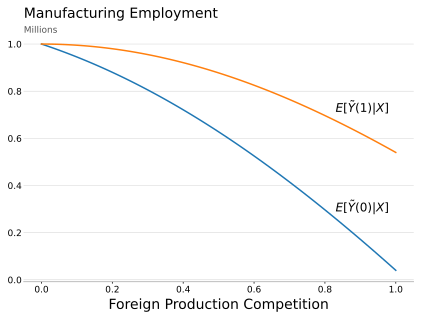

In [114]:
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.yaxis.grid(True, color='lightgray', linewidth=.5, zorder=2)
# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.06, s='Manufacturing Employment', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Millions", transform=ax.transAxes,
        fontsize=9, color="#555555")
xs = jnp.linspace(0, 1, 100)
for d in [0, 1]:
  ys = Potential_Outcome(xs, d)
  plt.plot(xs, ys)
plt.xlabel('Foreign Production Competition', size=14)
ax.annotate(r"$E[\tilde{Y}(1) | X]$",
        xy = (.8, .7),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold')
ax.annotate(r"$E[\tilde{Y}(0) | X]$",
        xy = (.8, .3),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold')
fig.savefig("po.png", bbox_inches="tight", dpi=300)
plt.show()

In [115]:
xs, ys, ds, ps = jax.vmap(Sample)(jax.random.split(jax.random.PRNGKey(0), 1000))

In [116]:
xs.shape

(1000,)

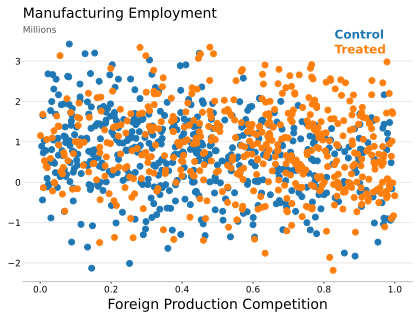

In [117]:
# define your palette
colors = {
    0: "#1f77b4",   # blue (default mpl color cycle)
    1: "#ff7f0e",   # orange (default mpl color cycle)
}

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.yaxis.grid(True, color='lightgray', linewidth=.5, zorder=2)
# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.06, s='Manufacturing Employment', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Millions", transform=ax.transAxes,
        fontsize=9, color="#555555")
for i in [0, 1]:
  plt.scatter(xs[ds==i], ys[ds==i], color=colors[i])
plt.xlabel('Foreign Production Competition', size=14)
ax.annotate("Treated",
        xy = (.8, .93),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color=colors[1])
ax.annotate("Control",
        xy = (.8, .99),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color=colors[0])
fig.savefig("po1.png", bbox_inches="tight", dpi=300)
plt.show()

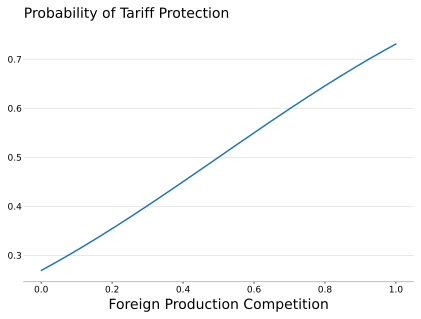

In [118]:
# define your palette
colors = {
    0: "#1f77b4",   # blue (default mpl color cycle)
    1: "#ff7f0e",   # orange (default mpl color cycle)
}

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.yaxis.grid(True, color='lightgray', linewidth=.5, zorder=2)
# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.06, s='Probability of Tariff Protection', transform=ax.transAxes, size=14)
order = jnp.argsort(xs)        # indices that would sort xs
xs_sorted = xs[order]
ps_sorted = ps[order]

plt.plot(xs_sorted, ps_sorted)
plt.xlabel('Foreign Production Competition', size=14)
fig.savefig("po2.png", bbox_inches="tight", dpi=300)
plt.show()

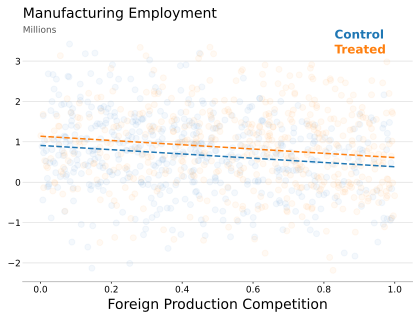

In [121]:
# define your palette
colors = {
    0: "#1f77b4",   # blue (default mpl color cycle)
    1: "#ff7f0e",   # orange (default mpl color cycle)
}

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.yaxis.grid(True, color='lightgray', linewidth=.5, zorder=2)
# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.06, s='Manufacturing Employment', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Millions", transform=ax.transAxes,
        fontsize=9, color="#555555")
#-------------------------------------------------------------------------------
regs = jnp.hstack((jnp.ones_like(xs).reshape(-1,1), xs.reshape(-1,1), ds.reshape(-1,1)))
coeffs = jnp.linalg.lstsq(regs, ys.reshape(-1,1))[0]

def Linear_Predict(params, x, d):
  return params[0] + params[1]*x + params[2]*d

sim_xs = jnp.linspace(0, 1, 100)
for d in [0, 1]:
  ys_hat = jax.vmap(Linear_Predict, in_axes=(None, 0, None))(coeffs, sim_xs, d)
  plt.plot(sim_xs, ys_hat, linestyle='--', color=colors[d])
#-------------------------------------------------------------------------------
for i in [0, 1]:
  plt.scatter(xs[ds==i], ys[ds==i], color=colors[i], alpha=0.05)

plt.xlabel('Foreign Production Competition', size=14)
ax.annotate("Treated",
        xy = (.8, .93),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color=colors[1])
ax.annotate("Control",
        xy = (.8, .99),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color=colors[0])
fig.savefig("po3.png", bbox_inches="tight", dpi=300)
plt.show()

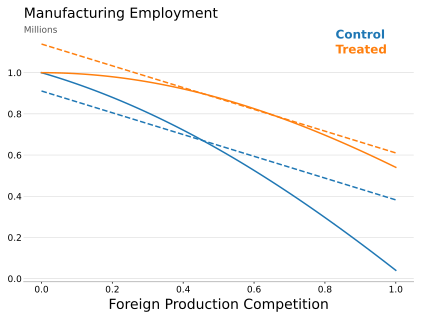

In [123]:
# define your palette
colors = {
    0: "#1f77b4",   # blue (default mpl color cycle)
    1: "#ff7f0e",   # orange (default mpl color cycle)
}

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.yaxis.grid(True, color='lightgray', linewidth=.5, zorder=2)
# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.06, s='Manufacturing Employment', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Millions", transform=ax.transAxes,
        fontsize=9, color="#555555")
#-------------------------------------------------------------------------------
regs = jnp.hstack((jnp.ones_like(xs).reshape(-1,1), xs.reshape(-1,1), ds.reshape(-1,1)))
coeffs = jnp.linalg.lstsq(regs, ys.reshape(-1,1))[0]

def Linear_Predict(params, x, d):
  return params[0] + params[1]*x + params[2]*d

sim_xs = jnp.linspace(0, 1, 100)
for d in [0, 1]:
  ys_hat = jax.vmap(Linear_Predict, in_axes=(None, 0, None))(coeffs, sim_xs, d)
  plt.plot(sim_xs, ys_hat, linestyle='--', color=colors[d])
  y_true = jax.vmap(Potential_Outcome, in_axes=(0, None))(sim_xs, d)
  plt.plot(sim_xs, y_true, linestyle='-', color=colors[d])


plt.xlabel('Foreign Production Competition', size=14)
ax.annotate("Treated",
        xy = (.8, .93),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color=colors[1])
ax.annotate("Control",
        xy = (.8, .99),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=12,
        weight='bold',
        color=colors[0])
fig.savefig("po4.png", bbox_inches="tight", dpi=300)
plt.show()